<a href="https://colab.research.google.com/github/davidwhitemsm/selected-open-datasources/blob/master/MSM_E15_Summary_Statistics_MBE_WBE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

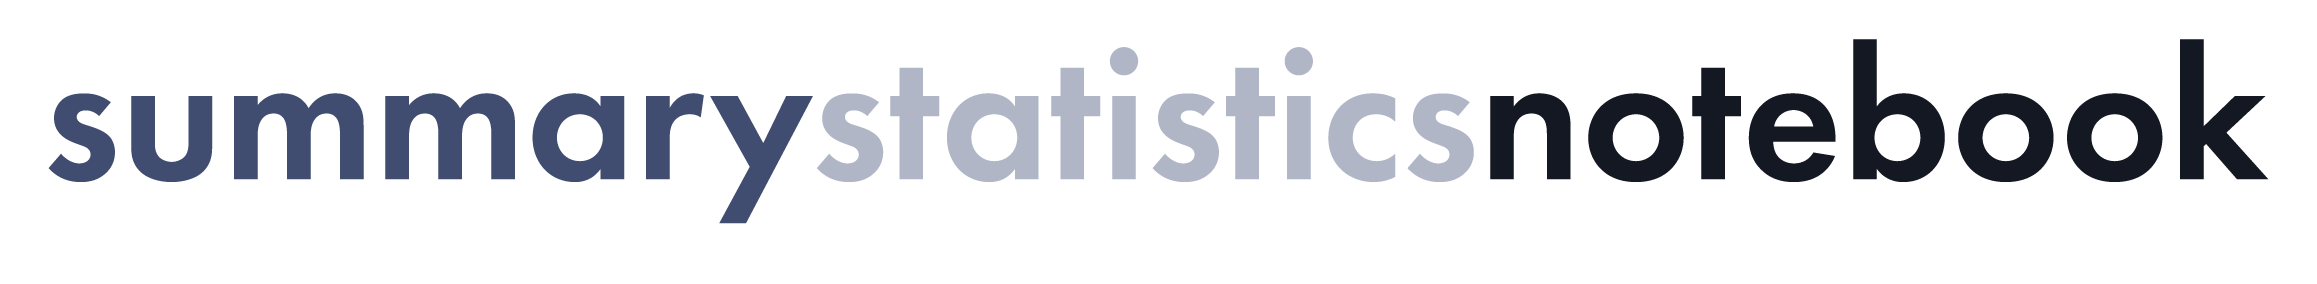

Catalogue Number: MSM-E15

Author: David White

Contact: david@msmdesign.nyc | msmdesign.nyc

Acknowledgements: NYC Open Data https://opendata.cityofnewyork.us

Language: Python

Libraries Used: NumPy, pandas

##**About this Dataset**##


**Data Source: City of New York** 

The City’s certification programs, including the Minority and Women-owned Business Enterprise (M/WBE) Program, the Emerging Business Enterprise (EBE) Program and the Locally-based Business Enterprise (LBE) Program certify, promote, and foster the growth of the City’s minority and women-owned businesses and eligible small construction and construction-related businesses. Companies that become certified obtain greater access to and information about contracting opportunities, receive technical assistance to better compete for those opportunities, and benefit from inclusion in the City’s Online Directory of Certified Firms. This list contains detailed information on certified companies, including a brief description of their work history, contact information, and detailed information about what the companies sell. 

https://data.cityofnewyork.us/Business/M-WBE-LBE-and-EBE-Certified-Business-List/ci93-uc8s





In [2]:
# import the libraries needed for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the dataset from GitHub and glimpse

data = pd.read_csv("https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/MSM-DS37-M_WBE__LBE__and_EBE_Certified_Business_List.csv")

In [4]:
data.head()

Vendor_Formal_Name  ...                                        EXPERIENCE4
0                                     AT Medical LLC  ...                                                NaN
1                            Edge Line Analytics LLC  ...                                                NaN
2  Galleros Robinson, Certified Public Accountant...  ...                                                NaN
3                               Oriental Lumber Inc.  ...  Supplied building materials, vinyl tiles, adhe...
4                        Applied Heat Transfer, Inc.  ...                                                NaN

[5 rows x 45 columns]

In [17]:
# list the column names and their data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11129 entries, 0 to 11128
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Vendor_Formal_Name               11129 non-null  object 
 1   Vendor_DBA                       1484 non-null   object 
 2   Contact_Name                     11076 non-null  object 
 3   telephone                        11092 non-null  object 
 4   fax                              5058 non-null   object 
 5   certification                    11129 non-null  object 
 6   Cert_Renewal_Date                7690 non-null   object 
 7   Ethnicity                        11111 non-null  object 
 8   Address1                         11095 non-null  object 
 9   Address2                         4204 non-null   object 
 10  City                             11129 non-null  object 
 11  State                            11129 non-null  object 
 12  ZIP               

##**(1) Find the total number of MBE/WBE businesses**##

In [42]:
total_count = data['Vendor_Formal_Name'].count()

total_count

11129

##**(2) Find the percentage of MBE/WBEs where the 100% work of the business is performed by he owner him or herself**##

In [52]:
percent_self = data['Job_Exp1_Percent_Self_Performed'].value_counts()



In [51]:
self = data[data['Job_Exp1_Percent_Self_Performed'] == 100]

total_self = self['Job_Exp1_Percent_Self_Performed'].count()

print(total_self/total_count)

0.7109353940156349


##**(3) Find the totals for each type of business certification**##

In [19]:
certification = data['certification'].value_counts()

certification

MBE                4880
WBE                3415
MBE,WBE            2775
MBE,LBE              17
EBE                  11
MBE,EBE              10
LBE                  10
MBE,WBE,LBE           3
MBE,WBE,EBE           3
WBE,LBE               2
MBE,LBE,EBE           1
MBE,WBE,LBE,EBE       1
WBE,EBE               1
Name: certification, dtype: int64

##**(4) Find the percentage of MBE/WBEs owned by minority women**##

In [60]:
pct_mw = (2775+3+3+2+1+1)/total_count

pct_mw

0.25024710216551355

##**(5) Find the totals for each ethnicity**##

In [21]:
ethnicity = data['Ethnicity'].value_counts()

ethnicity

BLACK              3437
NON-MINORITY       3418
ASIAN              2329
HISPANIC           1920
NATIVE AMERICAN       5
/A                    2
Name: Ethnicity, dtype: int64

##**(6) Find the total amount of bonding for all businesses**##




In [55]:
value = data['Aggregate_Bonding_Limit'].sum()

value

68837358825.0

##**(7) Find which locations are home to the most businessess**##

In [59]:
city = data['City'].value_counts()

city.head(20)

New York            2260
Brooklyn            1816
Bronx                713
Staten Island        267
Jamaica              196
Long Island City     151
Flushing             114
Yonkers               85
BROOKLYN              83
NEW YORK              78
Astoria               77
Mount Vernon          67
Queens Village        56
Hicksville            56
Valley Stream         53
Richmond Hill         53
New Rochelle          51
Jersey City           48
Woodside              46
Farmingdale           46
Name: City, dtype: int64

In [62]:
zip = data['ZIP'].value_counts()

zip.head(20)

10001    225
10018    166
11101    148
11201    136
10016    131
11215    100
10027    100
10017     95
10036     94
10013     93
11238     92
11234     84
10004     78
11434     77
11216     75
11225     72
10469     71
11233     69
10010     69
10025     69
Name: ZIP, dtype: int64